## Импорты

In [6]:
import numpy as np 
import pandas as pd 
# работа с данными.
# numpy - массивы. Основной класс - array
# pandas - надстройка над numpy для работы с табличными данными. Основные классы - Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
# Визуализация данных: графики, гистограммы и прочее

import sklearn
from sklearn.datasets import load_wine
# Библиотека для ML: датасеты, модели и вспомогательные инструменты

## Загрузка датасета

##### Датасет вин
Датасет содержит большое количество различных признаков, в нашем случае все они - количественные

Отдельно выделяется целевой признак (target) - то, что мы хотим научиться предсказывать. В тренировочных данных он известен, но в реальности - нет

В текущем датасете таргетом является сорт вина. По результатам химических экспериментов оформленных в виде таблицы данных, мы должны понять, что это за вино. Различные сорта обозначаются числами 0, 1 или 2. Всего, соответственно, 3 класса

In [7]:
wine = load_wine()
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [8]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [9]:
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df['target'] = wine['target']
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Работа с данными

In [10]:
np.random.seed(2023) # фиксируем seed. Это нужно, чтобы каждый раз при работе с рандомом из текущего места тетрадки, 
# мы получали один и тот же набор рандомных значений, и эксперимент можно было повторить в точности 

df = wine_df.sample(7) # возьмём 7 случайных значений
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,1
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


##### **Индексирование маскированием** - в квадратных скобках указываем массив булевых значений. 
True означает, что данную строку нужно взять, False - пропустить

Пример маски:

In [11]:
df['alcohol'] > 13

132    False
80     False
144    False
59     False
8       True
95     False
2       True
Name: alcohol, dtype: bool

Пример фильтрации по маске:

In [12]:
mask = (df['alcohol'] > 13)
df[mask] ## получим список строк, в которых значение alcohol больше 14

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
8,14.83,1.64,2.17,14.0,97.0,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
2,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


##### Маски поддерживают логические операции "И", "ИЛИ", "НЕ" (&, |, ~)

Пример применения сразу нескольких масок:

In [19]:
mask1 = (df['alcohol'] > 13) # строки, в которых alcohol > 13
mask2 = (df['ash'] > 2.2) # строки, в которых ash > 2.2
mask3 = (df['color_intensity'] < 6) # строки, в которых color_intensity < 6

no_mask3 = ~mask3 # строки, в которых color_intensity >= 6

df[(mask1 & mask2) | no_mask3] # либо alcohol > 14 И ash > 2.2, либо color_intensity >= 6

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


##### Столбцы таблицы поддерживают арифметические операции

In [20]:
alcohol_times_ash = df['alcohol'] * df['ash']
alcohol_times_ash

132    30.7440
80     24.0000
144    26.9500
59     16.8232
8      32.1811
95     27.4340
2      35.1372
dtype: float64

Полученный набор можно использовать как новый столбец датафрейма:

In [21]:
df['alcohol_times_ash'] = df['alcohol'] * df['ash']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_times_ash
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2,30.7440
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,1,24.0000
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2,26.9500
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,16.8232
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,32.1811
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1,27.4340
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,35.1372


Создадим новый столбец: разобьём alcohol на несколько интервалов:
- low
- middle
- high

In [22]:
min_alcohol = df['alcohol'].min() #mean
max_alcohol = df['alcohol'].max()
min_alcohol, max_alcohol

(12.0, 14.83)

In [23]:
def set_category_by_alcohol(alcohol_value):
    if alcohol_value < 13:
        return 'low'
    if 13 <= alcohol_value < 14:
        return 'middle'
    if 14 <= alcohol_value:
        return 'high'

Метод apply в pandas позволяет применить функцию ко всем значениям:

In [24]:
df['alcohol'].apply(set_category_by_alcohol)

132       low
80        low
144       low
59        low
8        high
95        low
2      middle
Name: alcohol, dtype: object

In [28]:
df['alcohol_level'] = df['alcohol'].apply(set_category_by_alcohol)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_times_ash,alcohol_level
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2,30.7440,low
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,1,24.0000,low
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2,26.9500,low
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,16.8232,low
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,32.1811,high
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1,27.4340,low
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,35.1372,middle


##### value_counts выведет распределение по категориям:

In [29]:
df['alcohol_level'].value_counts()

low       5
high      1
middle    1
Name: alcohol_level, dtype: int64

##### чтобы взять только значимые для нас столбцы, используем список их названий:

In [30]:
df[['alcohol', 'alcohol_level', 'ash', 'alcohol_times_ash', 'target']]

,alcohol,alcohol_level,ash,alcohol_times_ash,target
132,12.81,low,2.40,30.7440,2
80,12.00,low,2.00,24.0000,1
144,12.25,low,2.20,26.9500,2
59,12.37,low,1.36,16.8232,1
8,14.83,high,2.17,32.1811,0
95,12.47,low,2.20,27.4340,1
2,13.16,middle,2.67,35.1372,0


## Графические артефакты

##### Теперь будем использовать весь датасет. Применим разбиение по уровням для alcohol

In [31]:
wine_df['alcohol_level'] = wine_df['alcohol'].apply(set_category_by_alcohol)
wine_df.head(7) #выведет первые 7 строк датасета

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_level
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,high
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,middle
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,middle
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,high
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,middle
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,high
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,high


##### Прикольный прикол: красим датафрейм:

In [34]:
cm = sns.light_palette("green", as_cmap=True)
wine_df.head(7).style.background_gradient(cmap=cm).format(precision=2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_level
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00,0,high
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00,0,middle
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00,0,middle
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00,0,high
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00,0,middle
5,14.20,1.76,2.45,15.20,112.00,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.00,0,high
6,14.39,1.87,2.45,14.60,96.00,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.00,0,high


##### Построим гистограмму распределения alcohol

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

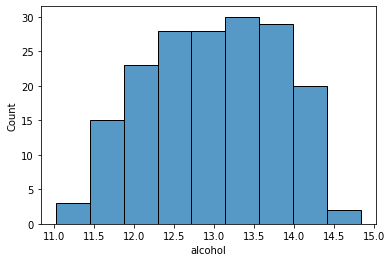

In [35]:
sns.histplot(data=wine_df, x='alcohol')

##### Разобьём по типам вина (целевому признаку):

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

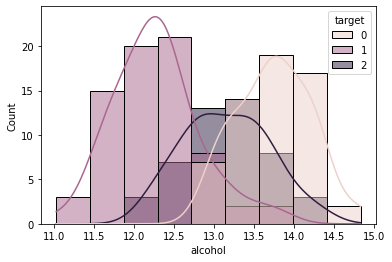

In [39]:
sns.histplot(data=wine_df, x="alcohol", kde=True, hue="target") # kde - автоматически посчитанная оценка плотности распределения

##### boxplot (ящик с усами) - менее детальный, но более простой для восприятия способ визуализировать данные по разным категориям

<AxesSubplot:xlabel='target', ylabel='alcohol'>

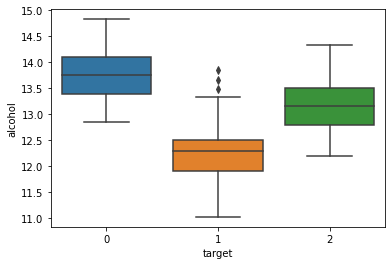

In [41]:
sns.boxplot(data=wine_df, y="alcohol", x="target")

<AxesSubplot:xlabel='alcohol_level', ylabel='alcohol'>

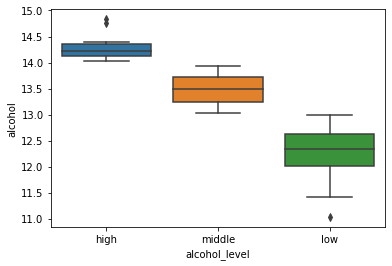

In [42]:
sns.boxplot(data=wine_df, y="alcohol", x="alcohol_level") # alcohol_level полностью зависит от alcohol,
# поэтому классы заметно отличаются друг от друга

TODO:

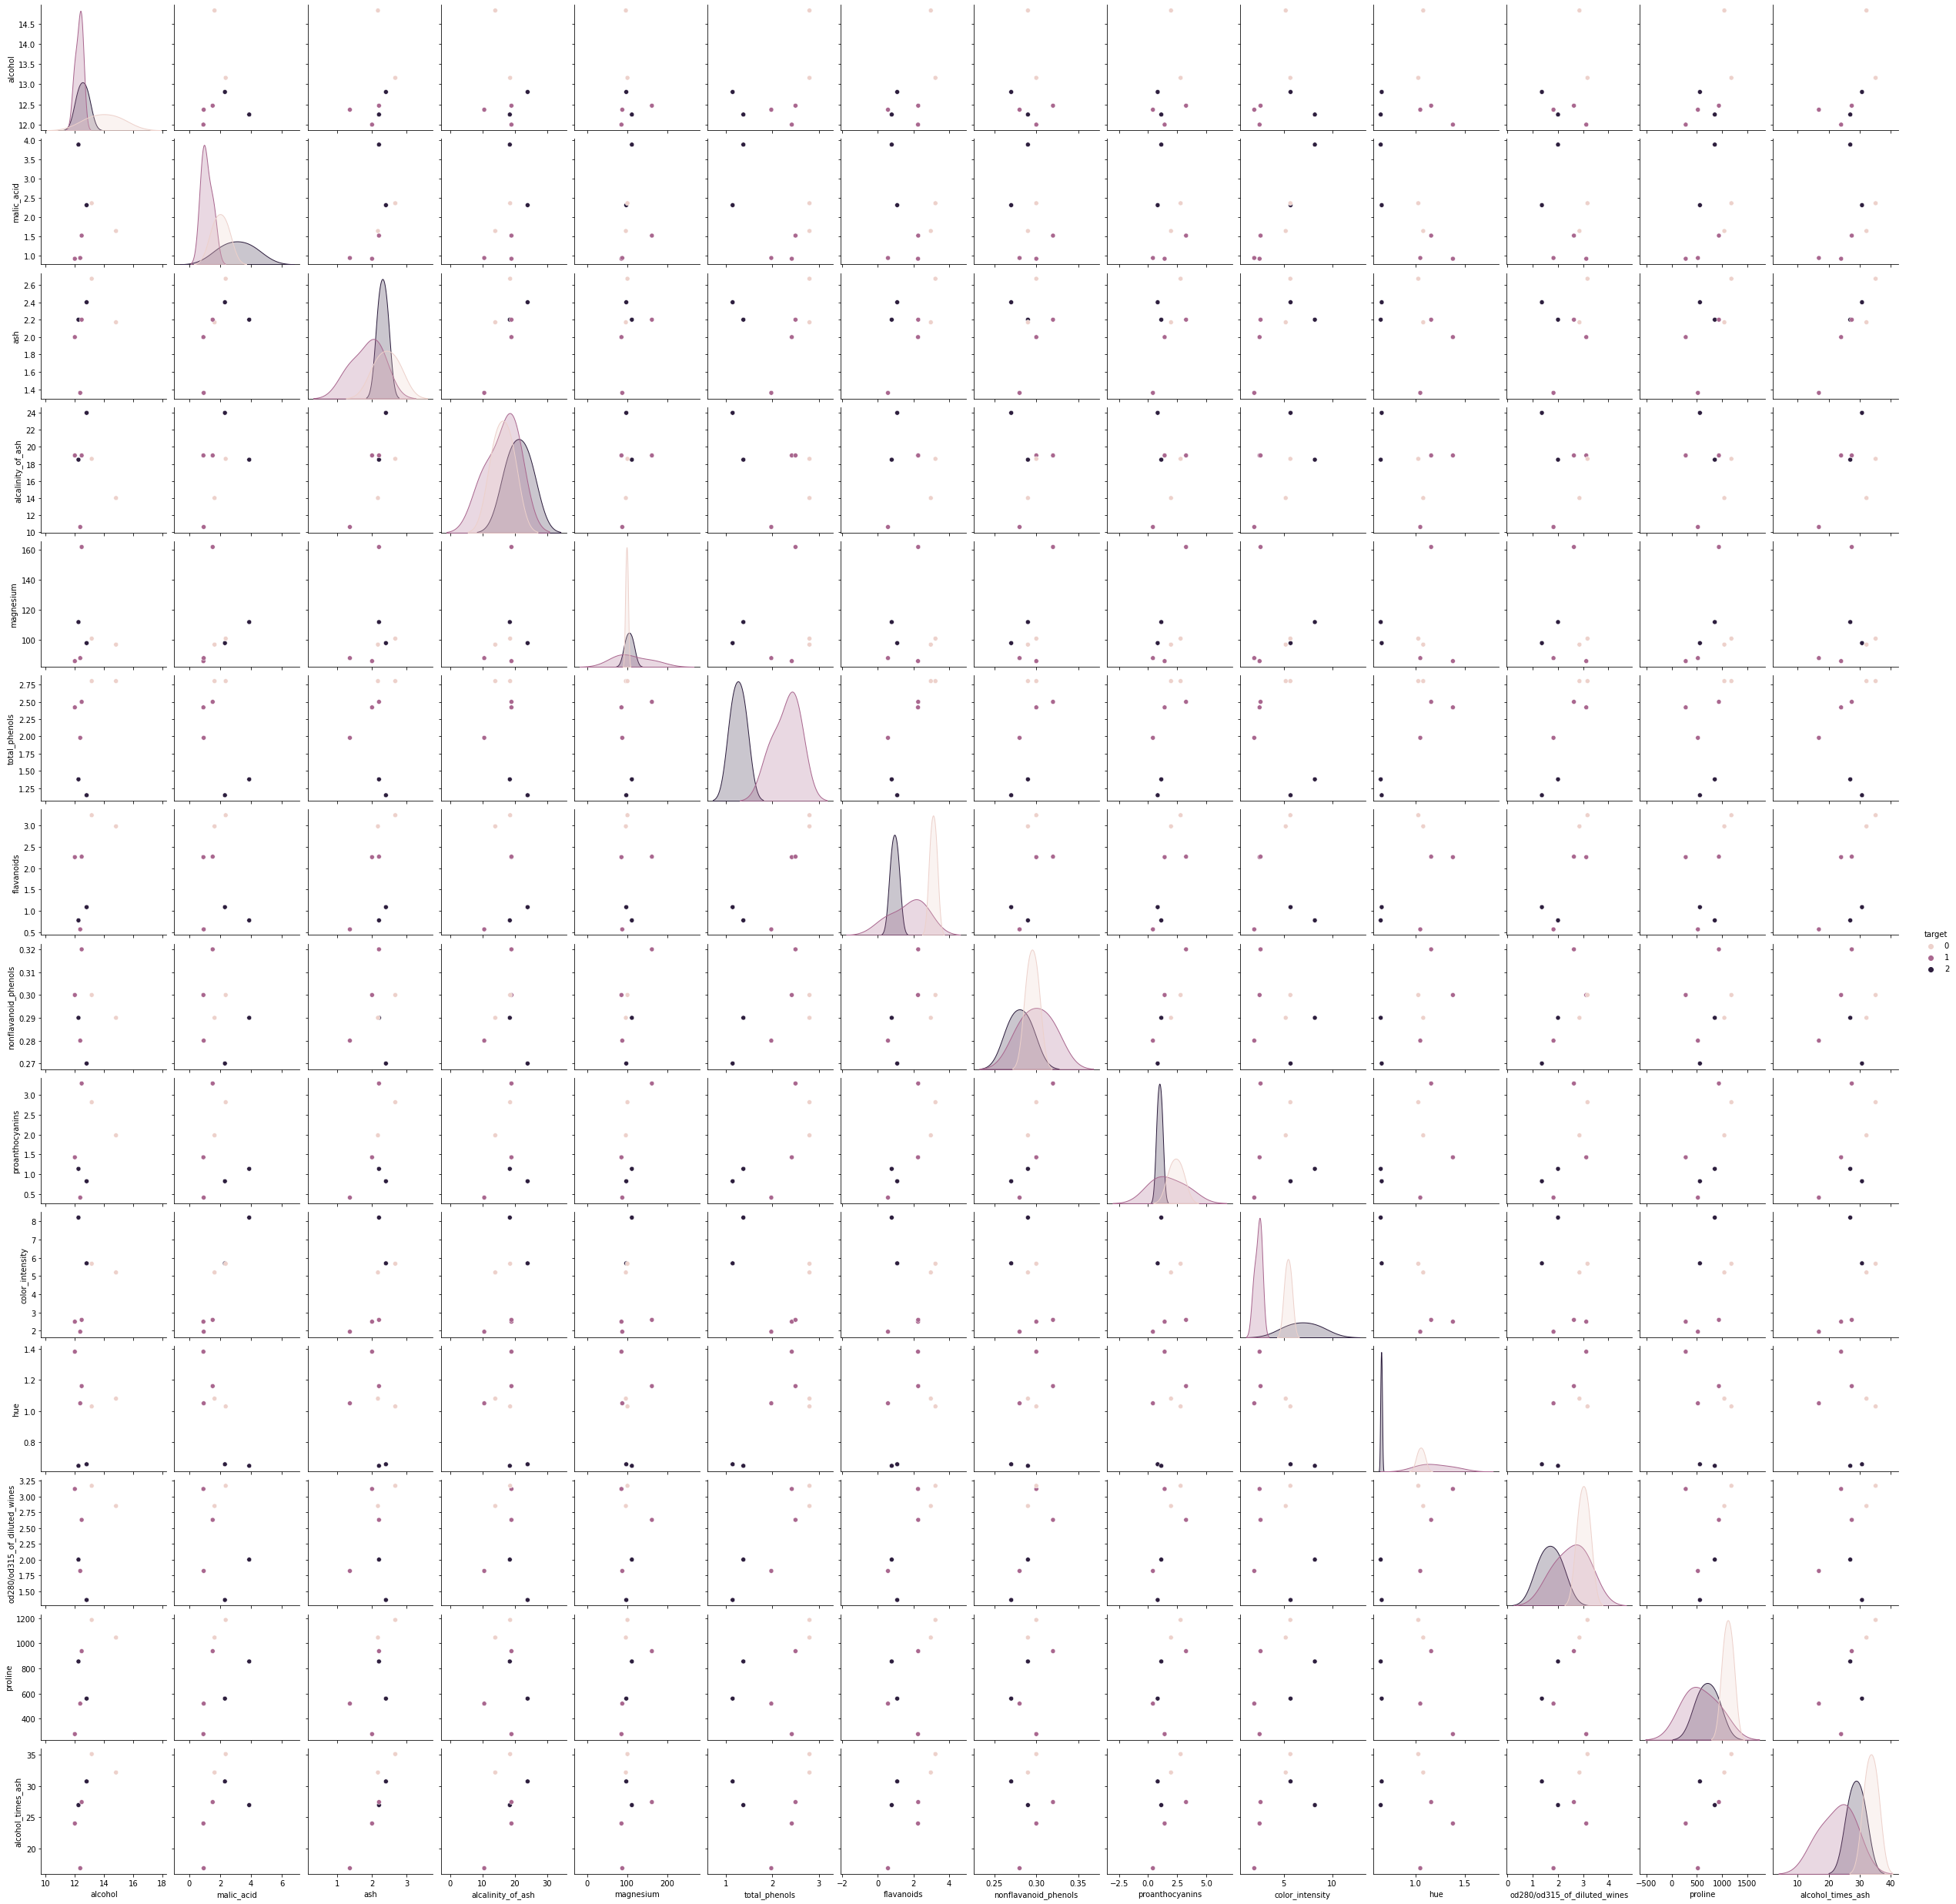

In [43]:
sns.pairplot(df, hue ='target')
plt.show()

In [53]:
# Кастомизация графиков

## Получение предсказаний

In [72]:
k = 0.2 # задаём долю тестовых данных в нашем датасете 
mask = (np.random.random(wine_df.shape[0]) < k) # формируем маску для тестовых данных

X_train = wine_df[~mask][wine_df.columns.drop(['target', 'alcohol_level'])] 
# X - признаки, на основе которых модель будет делать предсказание
y_train = wine_df[~mask]['target'] 
# y - целевой признак

X_test = wine_df[mask][wine_df.columns.drop(['target', 'alcohol_level'])]
y_test = wine_df[mask]['target']

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)

##### Обучение:

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

##### Получение предсказаний от модели:

In [75]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

TODO:
- One-hot encoding (удалить alcohol и сделать alcohol_level количественным)

## Итоги

##### Оценка качества предсказаний:

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

0.918918918918919

TODO:
- Confusion matrix
- F1, precision, recall

In [ ]:
alcohol_times_ash
alcohol

In [ ]:
ash = alcohol_times_ash / alcohol

In [44]:
# ash и alcohol не коррелируют
# ash и alcohol_times_ash коррелируют
# alcohol и alcohol_times_ash коррелируют